In [83]:
import cv2 as cv
import numpy as np
import apriltag
import matplotlib.pyplot as plt

In [84]:
def show_tag_corners_found(img, detections, color="red", window_name="Detected april tags corners", offline=False):
        image = np.copy(img)

        if color == "red":
                c = (255,0,0)
        elif color == "blue":
                c = (0,0,255)

        for i in range(len(detections)):
                for corner_id in range(len(detections[i].corners)):
                        corner = (int(detections[i].corners[corner_id][0]), int(detections[i].corners[corner_id][1]))

                        text_face = cv.FONT_HERSHEY_DUPLEX
                        text_scale = 0.5
                        text_thickness = 1
                        text = str(corner_id)
                        text_offset = 10

                        text_size, _ = cv.getTextSize(text, text_face, text_scale, text_thickness)
                        text_origin = (
                                int(corner[0] - text_size[0] / 2) + text_offset,
                                int(corner[1] + text_size[1] / 2) - text_offset
                        )

                        cv.circle(image, corner, 4, c, cv.FILLED)
                        cv.putText(image, text, text_origin, text_face, text_scale, (127,255,127), text_thickness, cv.LINE_AA)

        return image


def preprocess_image(img):
			 
        output = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

        return output

In [85]:
img_13 = cv.imread('/home/msccomputer/Desktop/10m2.png')
img_13 = cv.cvtColor(img_13, cv.COLOR_BGR2RGB)
img_13_g = preprocess_image(img_13)

In [86]:
options = apriltag.DetectorOptions(families="tag36h11",
														border=1,
														nthreads=4,
														quad_decimate=1.0,
														quad_blur=0.0,
														refine_edges=True,
														refine_decode=False,
														refine_pose=True,
														debug=False,
														quad_contours=True)
detector = apriltag.Detector(options)

In [87]:
det_13 = detector.detect(img_13_g)

In [88]:
img_with_corners = show_tag_corners_found(img_13, det_13)

([], [])

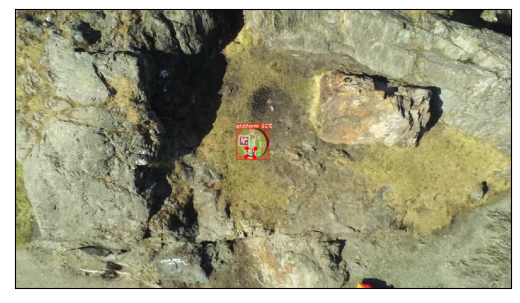

In [89]:
plt.figure()

plt.imshow(img_with_corners)
plt.xticks([])
plt.yticks([])